In [1]:
import numpy as np
import networkx as nwx
import matplotlib as mp
import pandas as pd
import statistics as st
pd.pandas.set_option('display.max_columns', None)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats.mstats import zscore
import scipy.stats as st

from sklearn.metrics import median_absolute_error, r2_score

import os
import json
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as sp_stats
import matplotlib.pyplot as plt
sns.set(style="white", font_scale=1.2)

import sklearn.metrics as skm
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import statistics as st

In [5]:
data_time_of_day = pd.read_excel("../data/ece_143_data.xlsx",sheet_name="Fig 2",usecols='A, B')

In [6]:
data_time_of_day

,Time of day (hour),Alertness
0,8,53
1,9,54
2,10,58
3,9,64
4,9,31
...,...,...
89530,17,79
89531,18,86
89532,19,84
89533,20,80


In [7]:
# data_time_of_day= data_time_of_day.drop(index=0)

In [8]:
# new_col = ['Time of day (hour)','Alertness'] 
# column_map = {data_time_of_day.columns[i]: new_col[i] for i in range(len(data_time_of_day.columns))}
# data_time_of_day= data_time_of_day.rename(columns=column_map)

In [9]:
# data_time_of_day

In [10]:

fig1_dict = dict()
for index, row in data_time_of_day.iterrows():
    time=row['Time of day (hour)']
    alert=row['Alertness']
    if fig1_dict.get(time) is not None:
        fig1_dict[time].append(alert)
    else:
        fig1_dict[time]=[]


avg = dict()
std = dict()
for index in fig1_dict.keys():
    if len(fig1_dict[index])>1:
        avg[index]=st.mean(fig1_dict[index])
        std[index]=st.stdev(fig1_dict[index])

[8, 9, 10, 11, 13, 14, 15, 18, 20, 12, 16, 17, 21, 7, 19, 23, 22, 6, 5, 2, 4, 3]


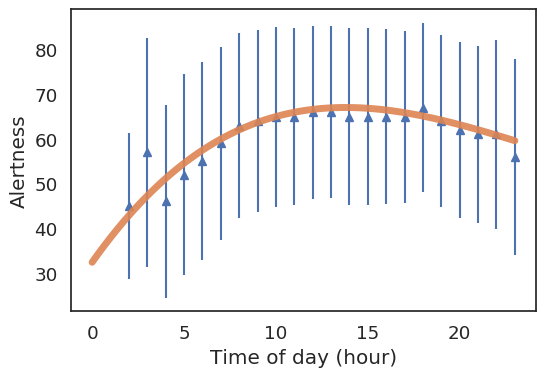

In [11]:
x = []

y = []
z =[]
fig, ax = plt.subplots(1, 1, dpi=100)
for i in fig1_dict.keys():
    if len(fig1_dict[i])>1:
        x.append(i)
        y.append(avg[i])
        z.append(std[i])

y = np.array(y)
z = np.array(z)

print(x)

plt.errorbar(x, y, z, linestyle='None', marker='^')
sns.regplot(data=data_time_of_day[data_time_of_day['Time of day (hour)'].between(0, 23)],
            x="Time of day (hour)", y="Alertness", order=3, 
            ci=None, line_kws=dict(lw=5, zorder=20, alpha=0.9), scatter=False, ax=ax)

plt.show()